# Import Modules and Load Cleaned Data

In [1]:
import sys
import os
import pandas as pd

# Add the src directory to the Python path

sys.path.append(os.path.abspath("../src"))

from exploratory_analysis import InsuranceEDA


# Initialize and load data

In [2]:
exploratory_analysis = InsuranceEDA('../Data/MachineLearningRating_v3/MachineLearningRating_v3.txt')

[INFO] 'TransactionMonth': 0 rows failed default parsing out of 1000098
[INFO] 'VehicleIntroDate': 552 rows failed default parsing out of 1000098
[WARNING] Some values in 'VehicleIntroDate' could not be parsed into datetime:
487033   NaT
512140   NaT
512141   NaT
512142   NaT
512143   NaT
Name: VehicleIntroDate, dtype: datetime64[ns]


d:\AI Mastery\Project\Risk-Analytics-Predictive-Modeling\src\exploratory_analysis.py:30: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  self.df[col] = pd.to_datetime(self.df[col], errors='coerce')


# Add calculated columns

In [3]:
exploratory_analysis.add_loss_ratio()

# Summary statistics

In [4]:
exploratory_analysis.summary_statistics()

Numeric data summary:
       UnderwrittenCoverID      PolicyID               TransactionMonth  \
count         1.000098e+06  1.000098e+06                        1000098   
mean          1.048175e+05  7.956682e+03  2015-02-28 10:49:29.147423744   
min           1.000000e+00  1.400000e+01            2013-10-01 00:00:00   
25%           5.514300e+04  4.500000e+03            2015-01-01 00:00:00   
50%           9.408300e+04  7.071000e+03            2015-04-01 00:00:00   
75%           1.391900e+05  1.107700e+04            2015-06-01 00:00:00   
max           3.011750e+05  2.324600e+04            2015-08-01 00:00:00   
std           6.329371e+04  5.290039e+03                            NaN   

         PostalCode        mmcode  RegistrationYear      Cylinders  \
count  1.000098e+06  9.995460e+05      1.000098e+06  999546.000000   
mean   3.020601e+03  5.487770e+07      2.010225e+03       4.046642   
min    1.000000e+00  4.041200e+06      1.987000e+03       0.000000   
25%    8.270000e+02  6

# Univariate plots

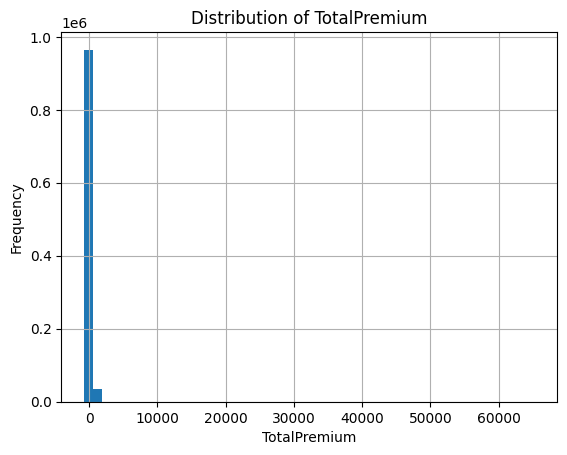

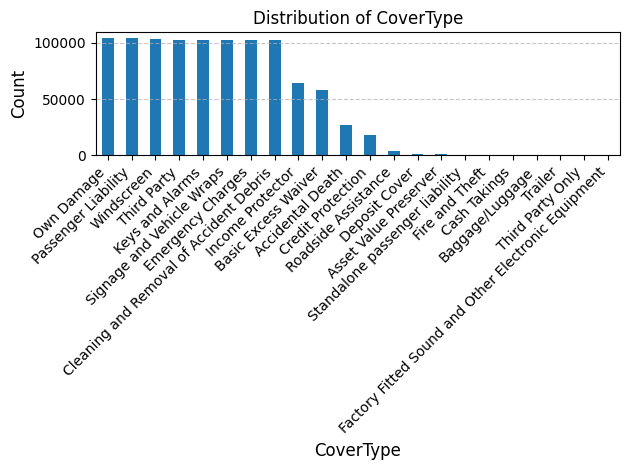

In [5]:
exploratory_analysis.plot_univariate()

# Heatmap of correlations

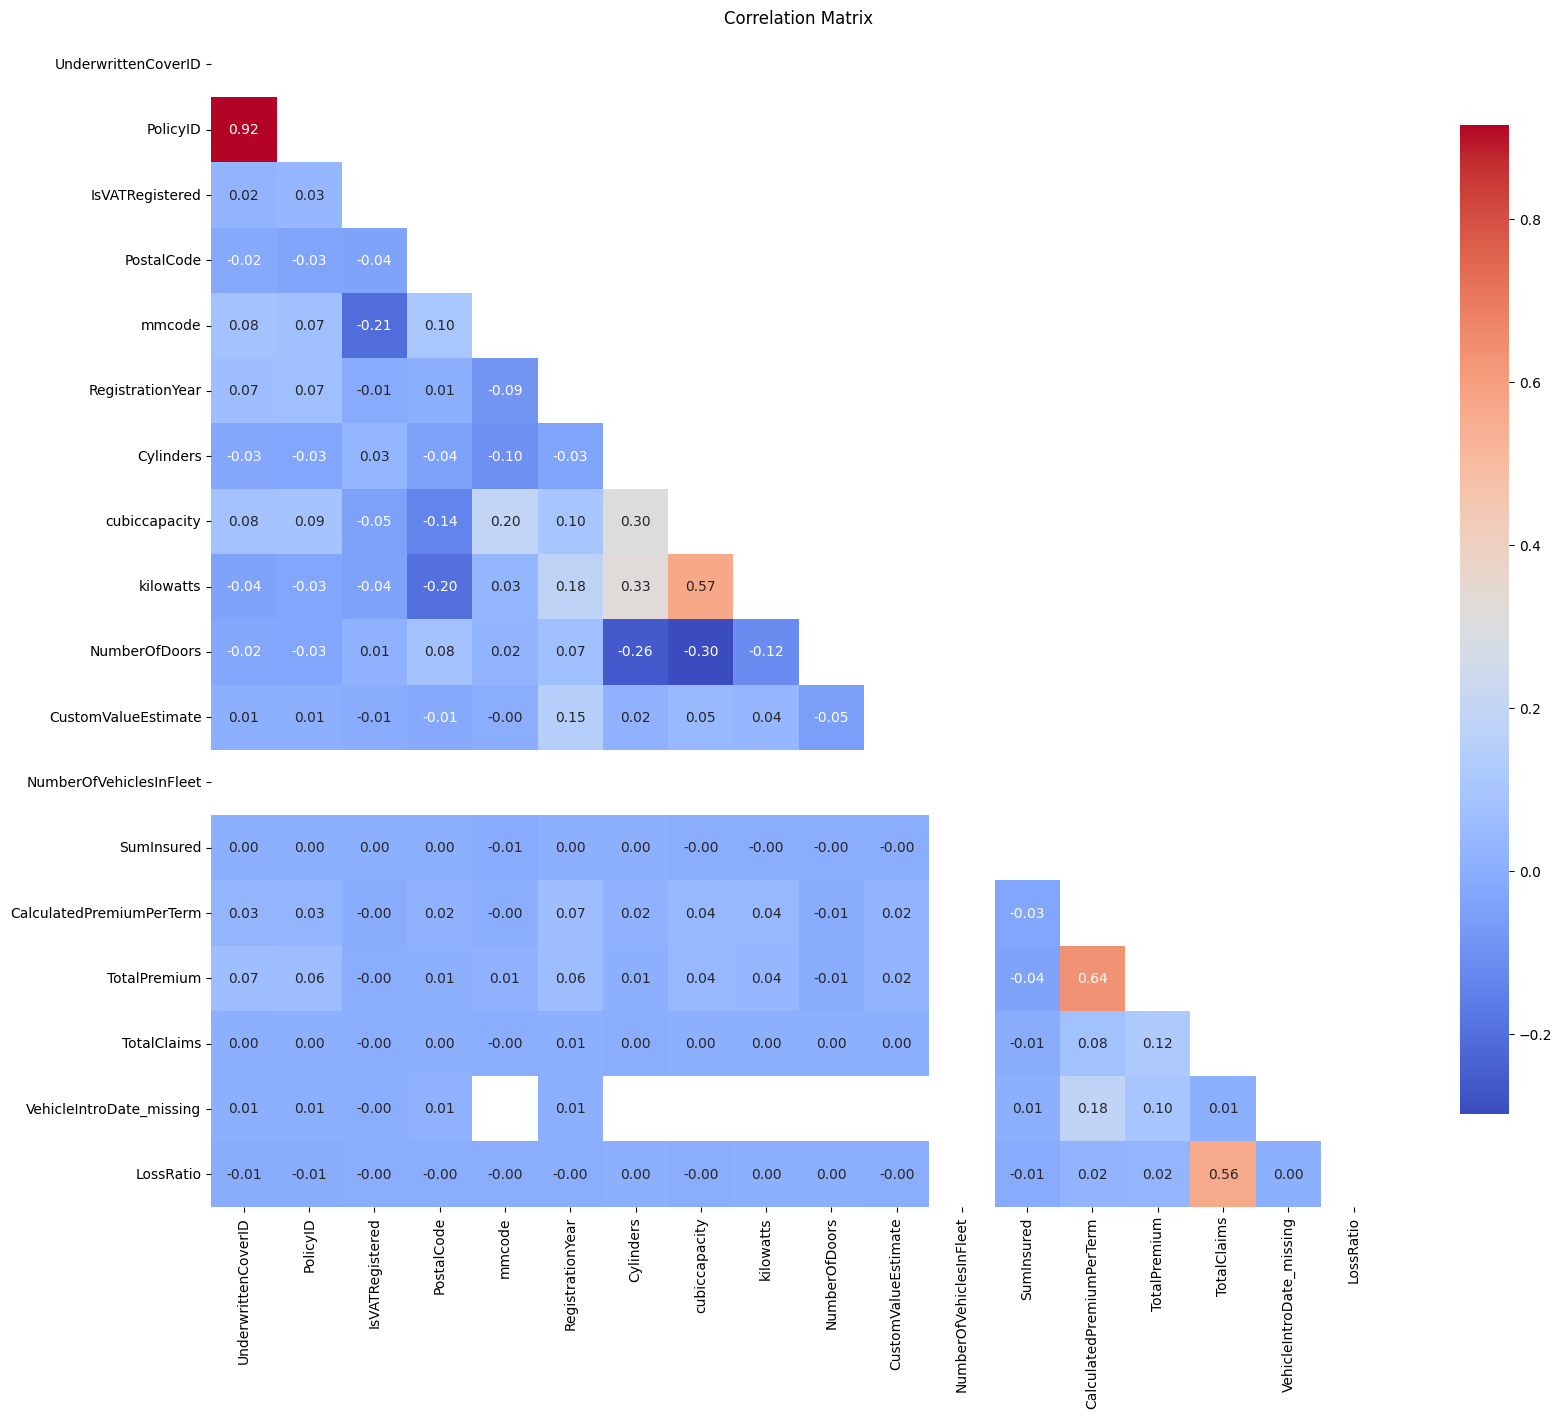

In [6]:
exploratory_analysis.correlation_heatmap()

# Temporal trend

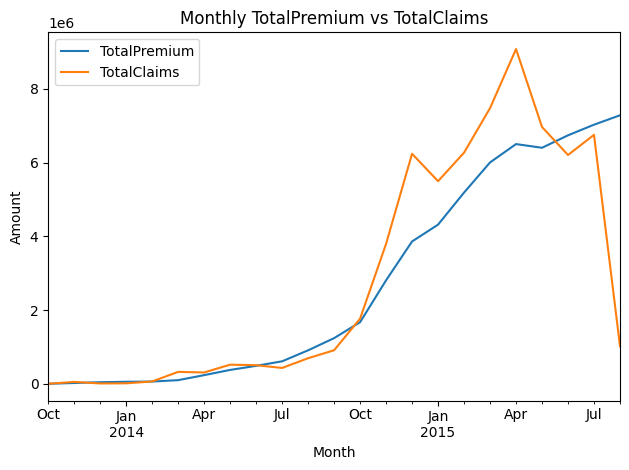

In [7]:
exploratory_analysis.temporal_trend()

# Loss Ratio by Category (Province, Gender, VehicleType)

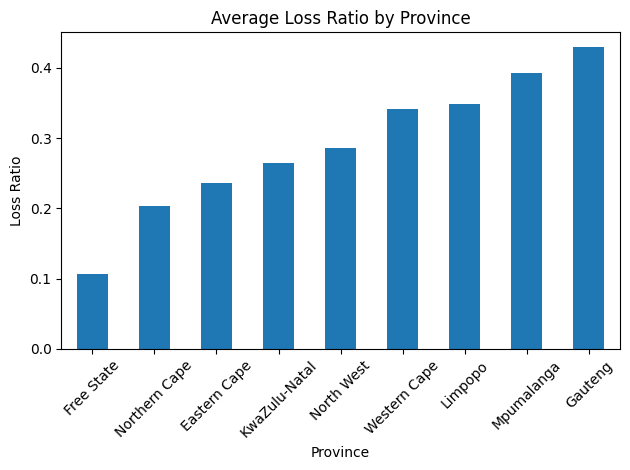

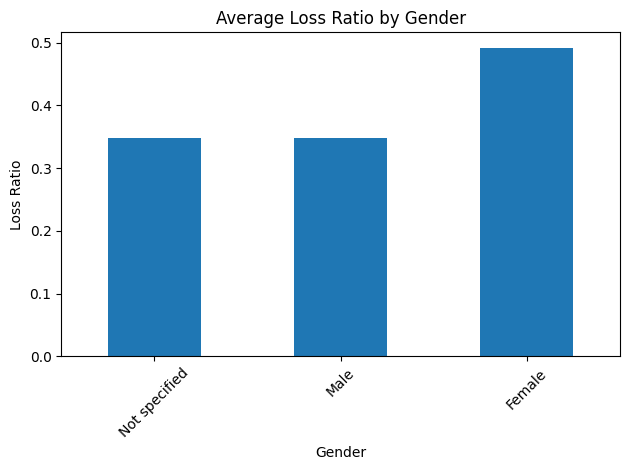

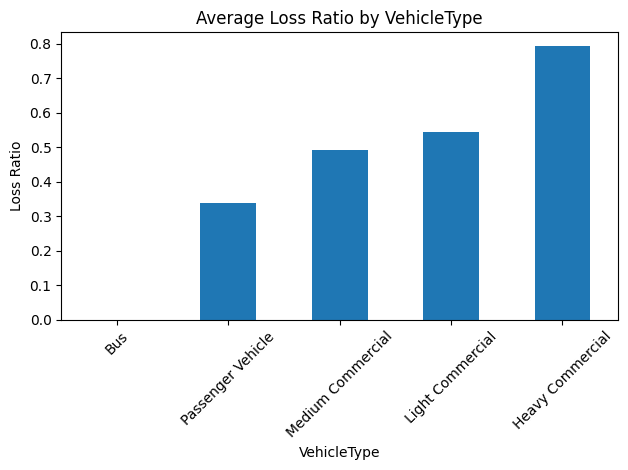

In [8]:
exploratory_analysis.loss_ratio_by_group("Province")
exploratory_analysis.loss_ratio_by_group("Gender")
exploratory_analysis.loss_ratio_by_group("VehicleType")

# Detect outliers

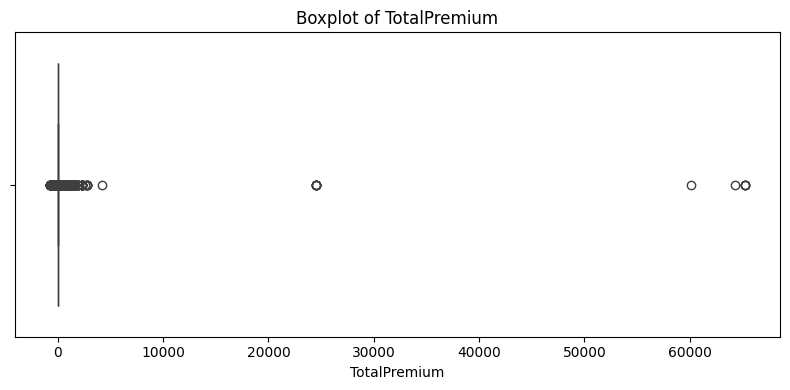

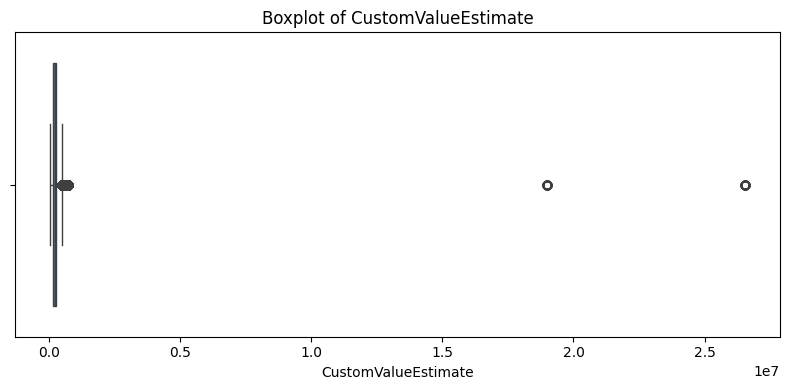

In [9]:
exploratory_analysis.boxplot_outliers("TotalPremium")
exploratory_analysis.boxplot_outliers("CustomValueEstimate")

# Save clean data

In [10]:
clean_df =exploratory_analysis.get_clean_data()
clean_df.to_csv("../Data/cleaned_insurance_data.csv", index=False)

In [12]:
df = pd.read_csv("../Data/cleaned_insurance_data.csv", low_memory=False)

In [14]:
print(df.isnull().sum().sort_values(ascending=False).head(25))

NumberOfVehiclesInFleet    1000098
CrossBorder                 999400
CustomValueEstimate         779642
Converted                   641901
WrittenOff                  641901
Rebuilt                     641901
LossRatio                   381634
NewVehicle                  153295
Bank                        145961
AccountType                  40232
Gender                        9536
MaritalStatus                 8259
NumberOfDoors                  552
VehicleIntroDate               552
VehicleType                    552
cubiccapacity                  552
Model                          552
Cylinders                      552
kilowatts                      552
bodytype                       552
mmcode                         552
make                           552
CapitalOutstanding               2
RegistrationYear                 0
SubCrestaZone                    0
dtype: int64


In [15]:
threshold = 0.8  # Drop columns where >80% of values are missing
drop_df = df.dropna(axis=1, thresh=int((1 - threshold) * len(df)))

In [16]:
print(drop_df.isnull().sum().sort_values(ascending=False).head(10))

CustomValueEstimate    779642
Converted              641901
Rebuilt                641901
WrittenOff             641901
LossRatio              381634
NewVehicle             153295
Bank                   145961
AccountType             40232
Gender                   9536
MaritalStatus            8259
dtype: int64
